In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from common import rank_order, get_all_data

players, ranked_matches, ranked_player_match_data, swiftplay_matches, swiftplay_player_match_data = get_all_data()

In [43]:
print(players.columns)
print(ranked_matches.columns)
print(ranked_player_match_data.columns)
print(swiftplay_matches.columns)
print(swiftplay_player_match_data.columns)

Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj

# Rank

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: xlabel='full_rank'>

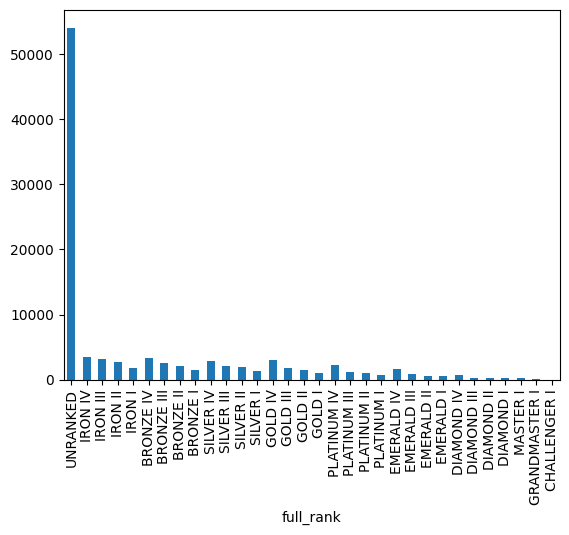

In [44]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

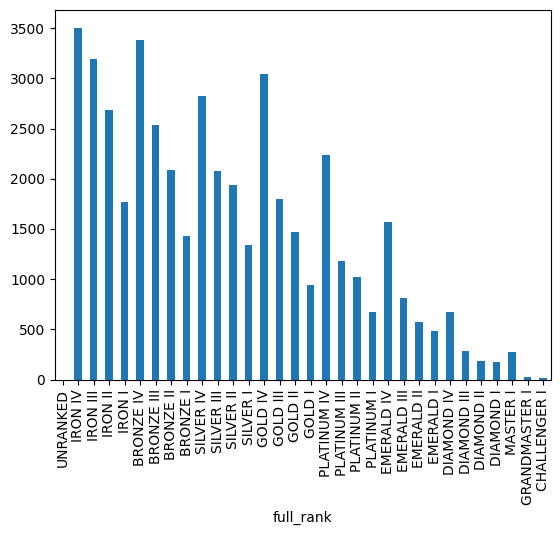

In [45]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

### Ranked Distribution

<Axes: xlabel='full_rank'>

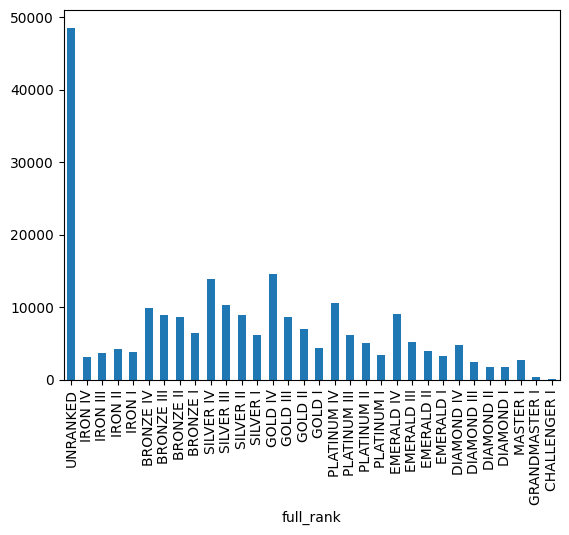

In [46]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

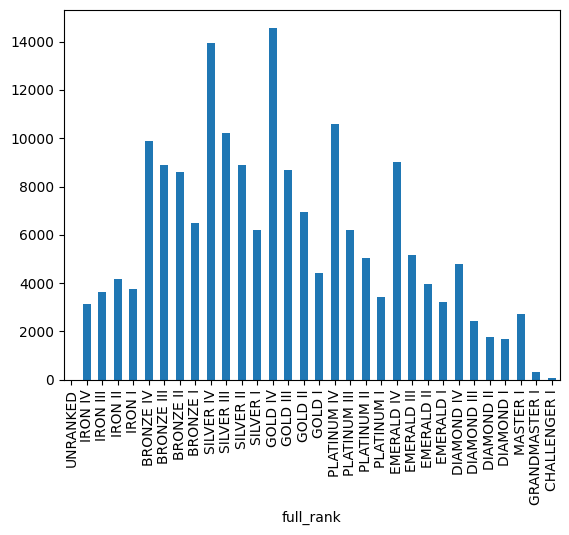

In [47]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

## Swiftplay: Winning vs. Losing Teams

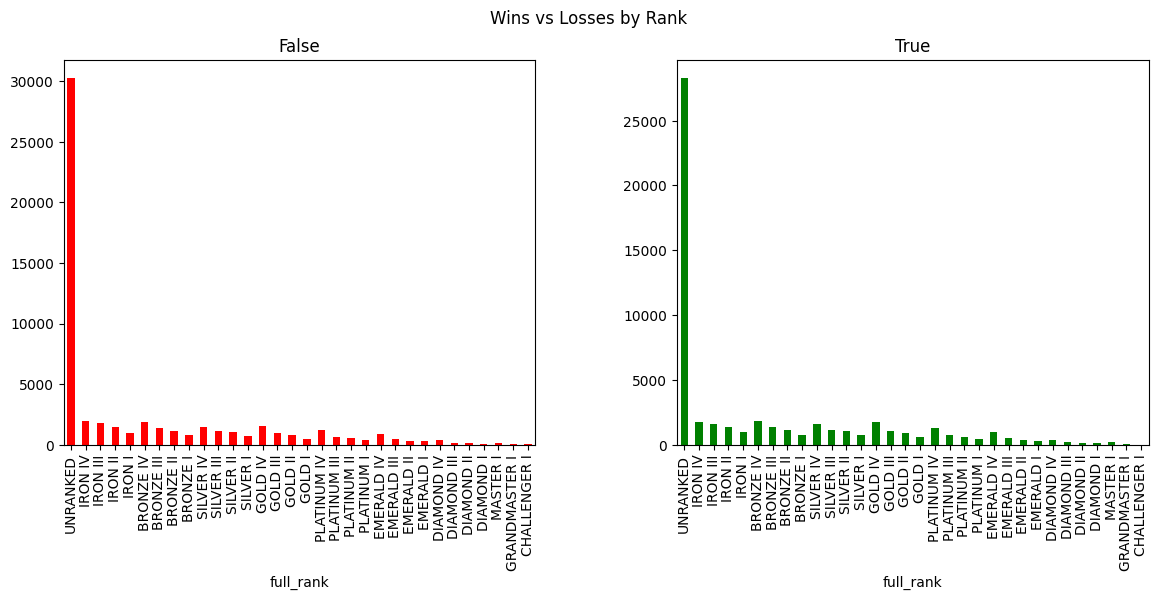

In [48]:
# Group by puuid and get each player's first recorded rank
player_ranks = swiftplay_player_match_data.groupby(["puuid", "win"])["full_rank"].first().reset_index()

# Count occurrences of each rank for win=0 and win=1
rank_counts = player_ranks.groupby("win")["full_rank"].value_counts().unstack(fill_value=0)  # Convert to DataFrame

# Reorder columns based on rank_order
rank_counts = rank_counts.reindex(columns=rank_order, fill_value=0)

rank_counts.T.plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

# Customize the plots
plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.show()

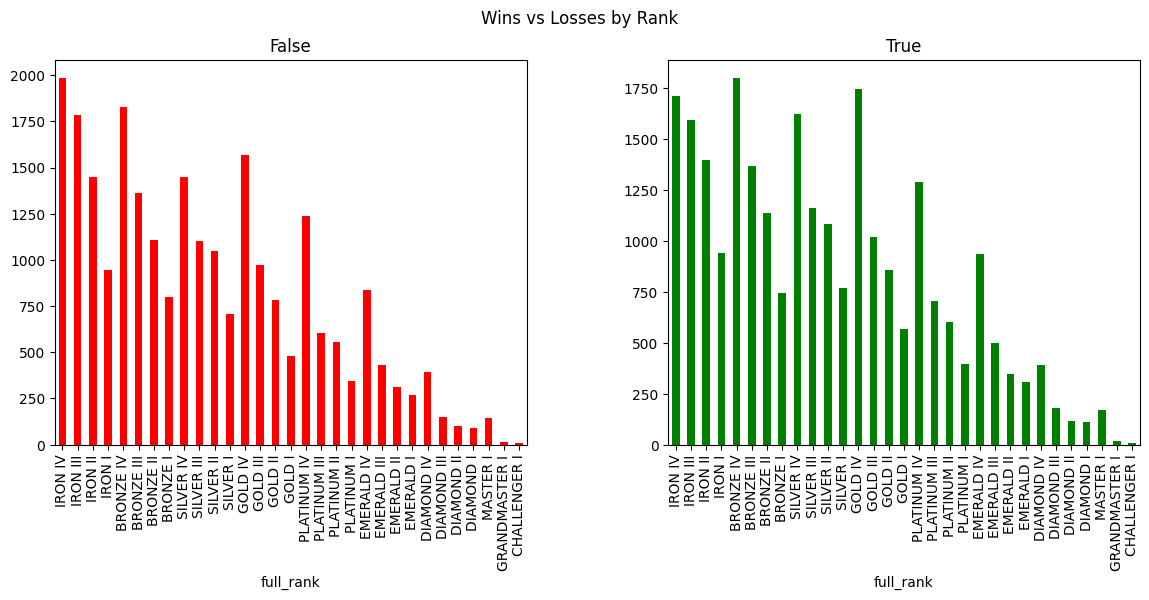

In [49]:
rank_counts.T.drop("UNRANKED").plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)
plt.show()

# Summoner Level

## Swifplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

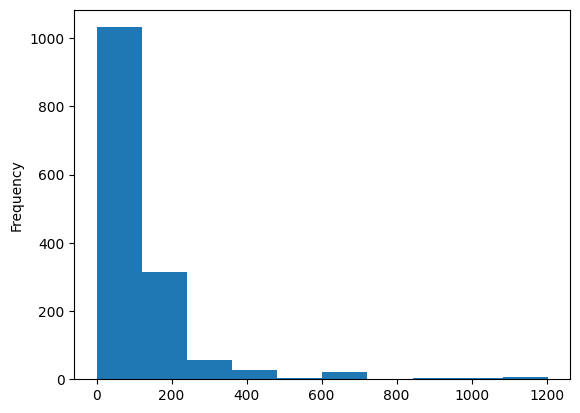

In [50]:
swiftplay_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

### Ranked Distribution

<Axes: ylabel='Frequency'>

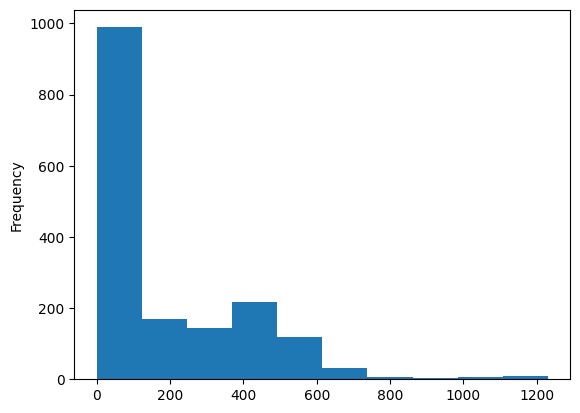

In [51]:
ranked_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

## Swiftplay: Winning vs. Losing Teams

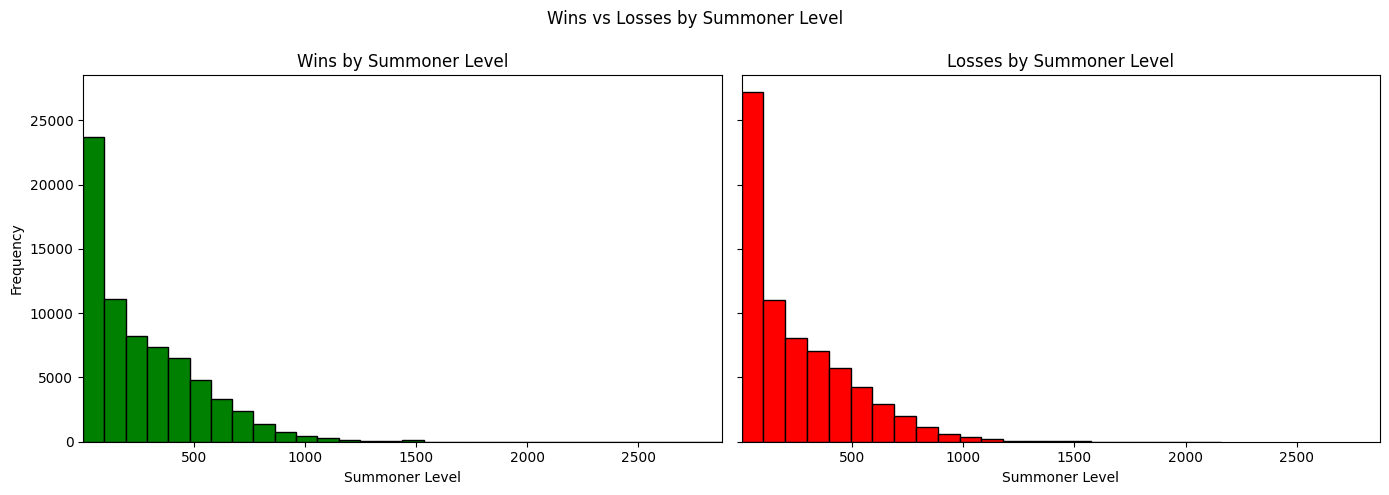

In [52]:
player_levels = swiftplay_player_match_data[['summonerLevel', 'win']]

# Plot histograms for summonerLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

min_x = player_levels['summonerLevel'].min()
max_x = player_levels['summonerLevel'].max()

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['summonerLevel'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by Summoner Level")
ax[0].set_xlabel("Summoner Level")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim([min_x, max_x])  # Set the same x-axis range

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['summonerLevel'].plot(kind='hist', bins=22, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by Summoner Level")
ax[1].set_xlabel("Summoner Level")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim([min_x, max_x])  # Set the same x-axis range

# Overall title
plt.suptitle("Wins vs Losses by Summoner Level")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# Champion Mastery

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

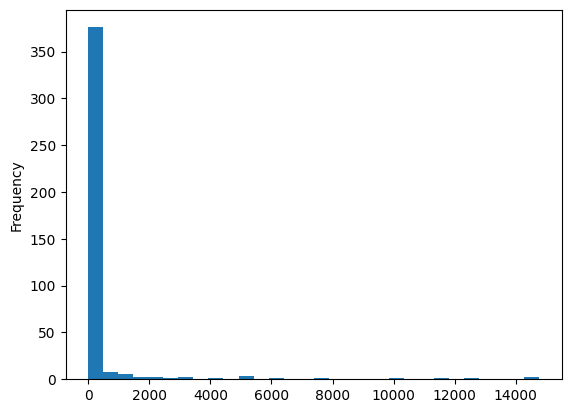

In [53]:
swiftplay_player_match_data["championLevel"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

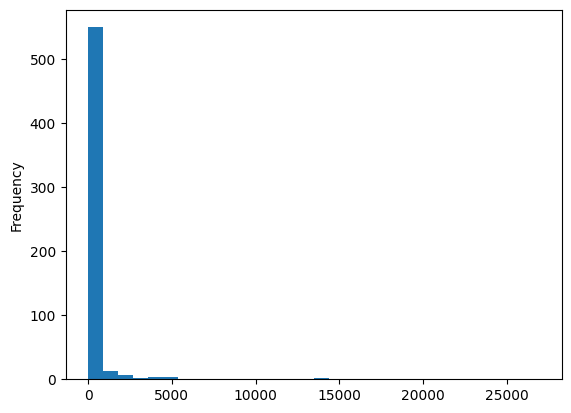

In [54]:
ranked_player_match_data["championLevel"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

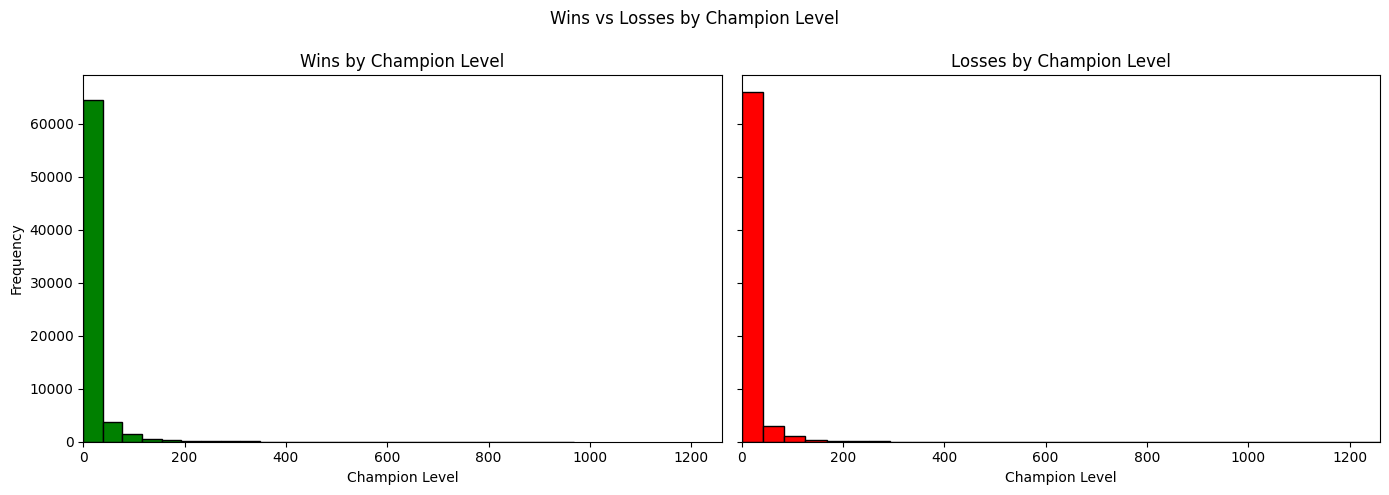

In [55]:
player_levels = swiftplay_player_match_data[['championLevel', 'win']]

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

min_x = player_levels['championLevel'].min()
max_x = player_levels['championLevel'].max()

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['championLevel'].plot(kind='hist', bins=25, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by Champion Level")
ax[0].set_xlabel("Champion Level")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim([min_x, max_x])  # Set the same x-axis range

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['championLevel'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by Champion Level")
ax[1].set_xlabel("Champion Level")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim([min_x, max_x])  # Set the same x-axis range

# Overall title
plt.suptitle("Wins vs Losses by Champion Level")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# K/D

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

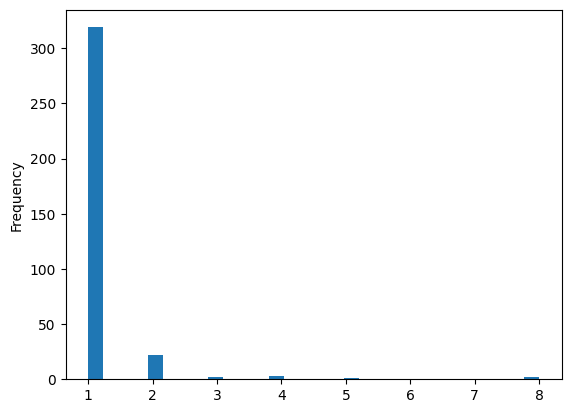

In [56]:
players["swiftplay_kd"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

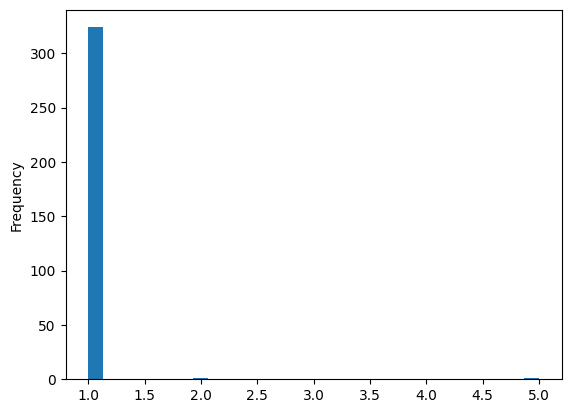

In [57]:
players["ranked_kd"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

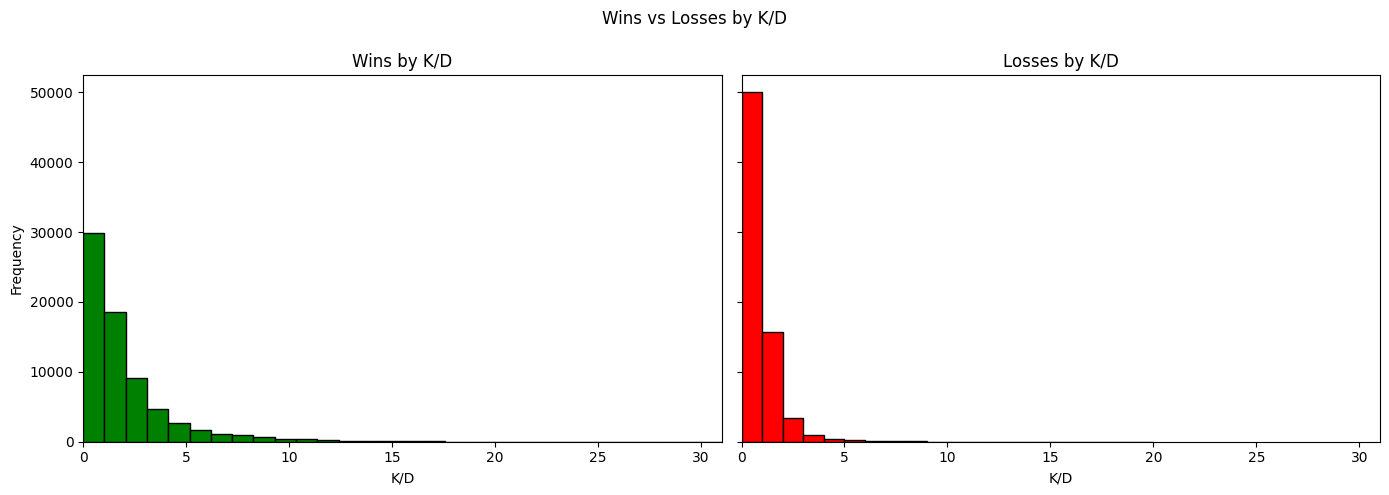

In [58]:
player_levels = swiftplay_player_match_data[['kills', 'deaths', 'win']].copy()
player_levels["kd"] = player_levels["kills"] / player_levels["deaths"].replace(0, 1)

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

min_x = player_levels['kd'].min()
max_x = player_levels['kd'].max()
# common_bins = np.linspace(min_x, max_x, 31)


# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['kd'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by K/D")
ax[0].set_xlabel("K/D")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim([min_x, max_x])  # Set the same x-axis range
    
# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['kd'].plot(kind='hist', bins=20, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by K/D")
ax[1].set_xlabel("K/D")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim([min_x, max_x])  # Set the same x-axis range

# Overall title
plt.suptitle("Wins vs Losses by K/D")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# A/D

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

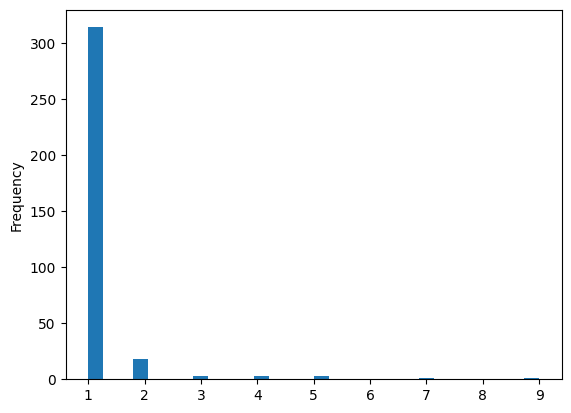

In [59]:
players["swiftplay_ad"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

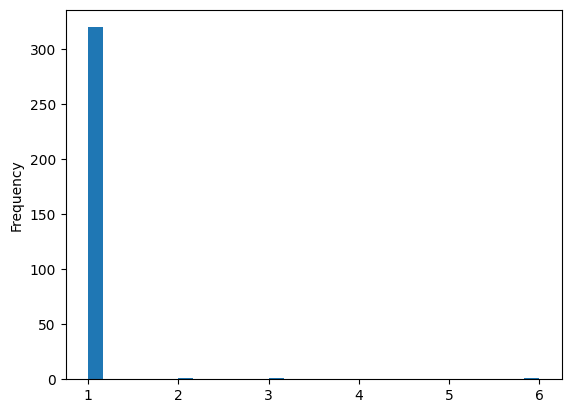

In [60]:
players["ranked_ad"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

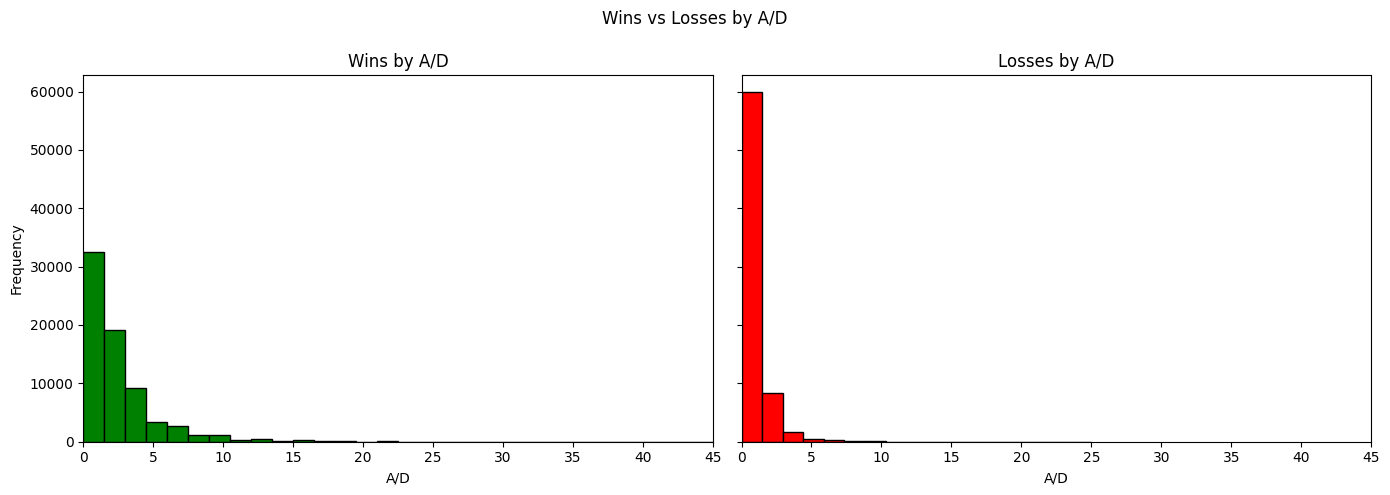

In [61]:
player_levels = swiftplay_player_match_data[['assists', 'deaths', 'win']].copy()
player_levels["ad"] = player_levels["assists"] / player_levels["deaths"].replace(0, 1)

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Find the overall min and max for consistent x-axis
min_x = player_levels['ad'].min()
max_x = player_levels['ad'].max()

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['ad'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by A/D")
ax[0].set_xlabel("A/D")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim([min_x, max_x])  # Set the same x-axis range

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['ad'].plot(kind='hist', bins=17, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by A/D")
ax[1].set_xlabel("A/D")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim([min_x, max_x])  # Set the same x-axis range

# Overall title
plt.suptitle("Wins vs Losses by A/D")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# Hypothesis Testing

## Rank

### Swiftplay vs. Ranked

In [62]:
swiftplay_ranks = swiftplay_player_match_data.groupby("puuid")["full_rank"].first().cat.codes
ranked_ranks = ranked_player_match_data.groupby("puuid")["full_rank"].first().cat.codes

print(f"Swiftplay mean Rank: {swiftplay_ranks.mean():.2f}")
print(f"Ranked mean Rank: {ranked_ranks.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_ranks, ranked_ranks, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Full Rank: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Rank: 4.78
Ranked mean Rank: 10.52
Swiftplay vs. Ranked Full Rank: t=-205.418, p=0.000


### Swiftplay: Winning vs. Losing Teams

In [63]:
winning_ranks = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 1].groupby("puuid")["full_rank"].first().cat.codes
losing_ranks = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 0].groupby("puuid")["full_rank"].first().cat.codes

print(f"Swiftplay winning team mean Rank: {winning_ranks.mean():.2f}")
print(f"Swiftplay losing team mean Rank: {losing_ranks.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_ranks, losing_ranks, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Full Rank: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Rank: 5.13
Swiftplay losing team mean Rank: 4.65
Winning vs. Losing Full Rank: t=11.068, p=0.000


Practically, the difference between 5.13 and 4.65 isn't really significant.

## Summoner Level

### Swiftplay vs. Ranked

In [64]:
swiftplay_levels = swiftplay_player_match_data['summonerLevel']
ranked_levels = ranked_player_match_data['summonerLevel']

print(f"Swiftplay mean Summoner Level: {swiftplay_levels.mean():.2f}")
print(f"Ranked mean Summoner Level: {ranked_levels.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_levels, ranked_levels, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Summoner Level: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Summoner Level: 263.30
Ranked mean Summoner Level: 347.33
Swiftplay vs. Ranked Summoner Level: t=-104.146, p=0.000


### Swiftplay: Winning vs. Losing Teams

In [65]:
winning_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 1]['summonerLevel']
losing_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 0]['summonerLevel']

print(f"Swiftplay winning team mean Summoner Level: {winning_levels.mean():.2f}")
print(f"Swiftplay losing team mean Summoner Level: {losing_levels.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_levels, losing_levels, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Summoner Level: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Summoner Level: 273.65
Swiftplay losing team mean Summoner Level: 252.95
Winning vs. Losing Summoner Level: t=15.601, p=0.000


## Champion Mastery

### Swiftplay vs. Ranked

In [66]:
swiftplay_levels = swiftplay_player_match_data['championLevel']
ranked_levels = ranked_player_match_data['championLevel']

print(f"Swiftplay mean Champion Level: {swiftplay_levels.mean():.2f}")
print(f"Ranked mean Champion Level: {ranked_levels.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_levels, ranked_levels, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Champion Level: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Champion Level: 15.51
Ranked mean Champion Level: 21.39
Swiftplay vs. Ranked Champion Level: t=-53.164, p=0.000


### Swiftplay: Winning vs. Losing Team

In [67]:
winning_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 1]['championLevel']
losing_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 0]['championLevel']

print(f"Swiftplay winning team mean Champion Level: {winning_levels.mean():.2f}")
print(f"Swiftplay losing team mean Champion Level: {losing_levels.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_levels, losing_levels, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Champion Level: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Champion Level: 16.52
Swiftplay losing team mean Champion Level: 14.50
Winning vs. Losing Champion Level: t=12.064, p=0.000


## K/D

### Swiftplay vs. Ranked

In [68]:
swiftplay_kd = players['swiftplay_kd'].dropna()
ranked_kd = players['ranked_kd'].dropna()

print(f"Swiftplay mean K/D: {swiftplay_kd.mean():.2f}")
print(f"Ranked mean K/D: {ranked_kd.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_kd, ranked_kd, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked K/D: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean K/D: 1.27
Ranked mean K/D: 1.00
Swiftplay vs. Ranked K/D: t=4.538, p=0.000


### Swiftplay: Winning vs. Losing Team

In [69]:
player_levels = swiftplay_player_match_data[['kills', 'deaths', 'win']].copy()
player_levels["kd"] = player_levels["kills"] / player_levels["deaths"].replace(0, 1)

winning_kd = player_levels[player_levels['win'] == 1]['kd']
losing_kd = player_levels[player_levels['win'] == 0]['kd']

print(f"Swiftplay winning team mean K/D: {winning_kd.mean():.2f}")
print(f"Swiftplay losing team mean K/D: {losing_kd.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_kd, losing_kd, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing K/D: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean K/D: 2.11
Swiftplay losing team mean K/D: 0.75
Winning vs. Losing K/D: t=144.246, p=0.000


## A/D

### Swiftplay vs. Ranked

In [70]:
swiftplay_ad = players['swiftplay_ad'].dropna()
ranked_ad = players['ranked_ad'].dropna()

print(f"Swiftplay mean A/D: {swiftplay_ad.mean():.2f}")
print(f"Ranked mean A/D: {ranked_ad.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_ad, ranked_ad, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked A/D: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean A/D: 1.32
Ranked mean A/D: 1.35
Swiftplay vs. Ranked A/D: t=-0.448, p=0.655


Observe that this is the only non-significant p-value! Maybe Swiftplay doesn't put enough additional emphasis on playing support?

### Swiftplay: Winning vs. Losing Team

In [71]:
player_levels = swiftplay_player_match_data[['assists', 'deaths', 'win']].copy()
player_levels["ad"] = player_levels["assists"] / player_levels["deaths"].replace(0, 1)

winning_ad = player_levels[player_levels['win'] == 1]['ad']
losing_ad = player_levels[player_levels['win'] == 0]['ad']

print(f"Swiftplay winning team mean A/D: {winning_ad.mean():.2f}")
print(f"Swiftplay losing team mean A/D: {losing_ad.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_ad, losing_ad, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing A/D: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean A/D: 2.43
Swiftplay losing team mean A/D: 0.85
Winning vs. Losing A/D: t=142.031, p=0.000


# Correlations

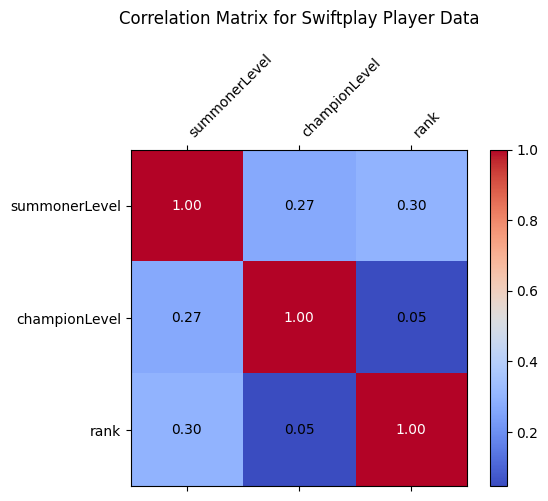

In [70]:
numeric_ranks = swiftplay_player_match_data["full_rank"].cat.codes.copy()

corr_df = swiftplay_player_match_data[["summonerLevel", "championLevel"]].copy()

corr_df = corr_df.join(numeric_ranks.rename("rank"))

correlation_matrix = corr_df.corr()

# Plot with matplotlib
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(correlation_matrix, cmap="coolwarm")

# Set axis ticks and labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

# Add correlation values to the cells
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')

# Add colorbar
fig.colorbar(cax)
plt.title("Correlation Matrix for Swiftplay Player Data", pad=20)
plt.tight_layout()
plt.show()

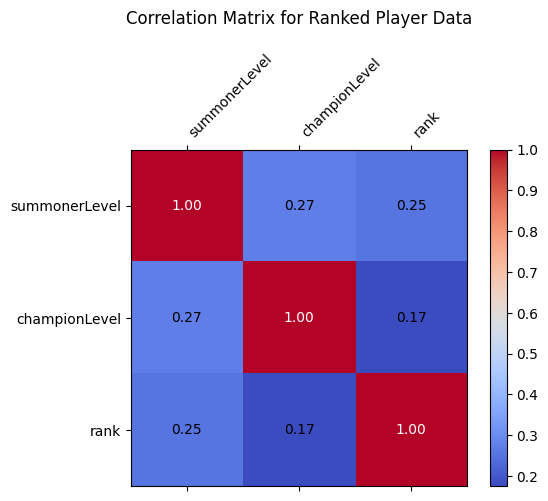

In [71]:
numeric_ranks = ranked_player_match_data["full_rank"].cat.codes.copy()

corr_df = ranked_player_match_data[["summonerLevel", "championLevel"]].copy()

corr_df = corr_df.join(numeric_ranks.rename("rank"))

correlation_matrix = corr_df.corr()

# Plot with matplotlib
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(correlation_matrix, cmap="coolwarm")

# Set axis ticks and labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

# Add correlation values to the cells
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')

# Add colorbar
fig.colorbar(cax)
plt.title("Correlation Matrix for Ranked Player Data", pad=20)
plt.tight_layout()
plt.show()

# Do players make a conscious decision to choose lower-level champions in Swiftplay, or are they just worse at the game?

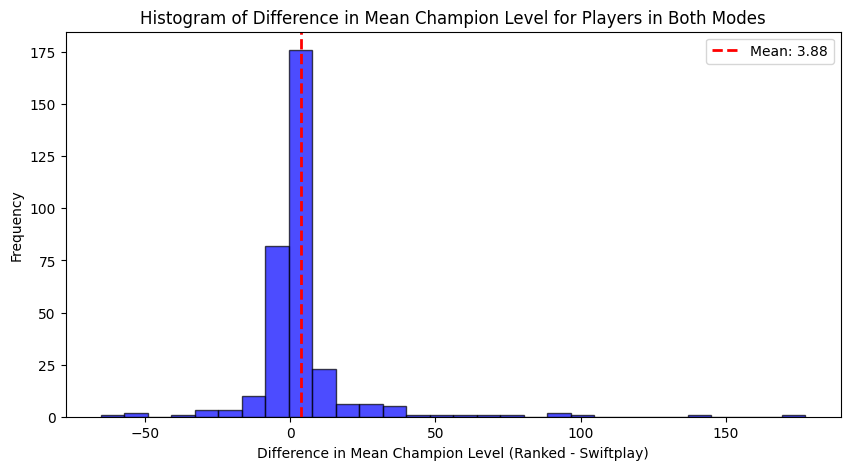

Mean difference in Champion Level: 3.88
One-sample t-test: t=3.601, p=0.000


In [72]:
players_who_play_both = players.dropna(subset=["ranked_kd"])["puuid"]

swiftplay_filtered = swiftplay_player_match_data[swiftplay_player_match_data["puuid"].isin(players_who_play_both)]
ranked_filtered = ranked_player_match_data[ranked_player_match_data["puuid"].isin(players_who_play_both)]

swiftplay_means = swiftplay_filtered.groupby("puuid")["championLevel"].mean()
ranked_means = ranked_filtered.groupby("puuid")["championLevel"].mean()

level_differences = ranked_means - swiftplay_means

# Plot histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(level_differences, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(level_differences.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {level_differences.mean():.2f}')
plt.xlabel("Difference in Mean Champion Level (Ranked - Swiftplay)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference in Mean Champion Level for Players in Both Modes")
plt.legend()
plt.show()

print(f"Mean difference in Champion Level: {level_differences.mean():.2f}")
t_stat, p_value = stats.ttest_1samp(level_differences, 0)  # One-sample t-test
print(f"One-sample t-test: t={t_stat:.3f}, p={p_value:.3f}")

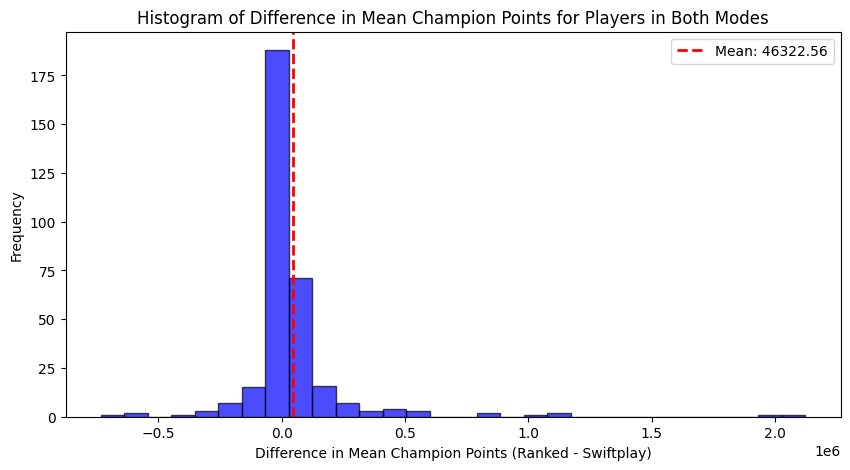

Mean difference in Champion Points: 46322.56
One-sample t-test: t=3.550, p=0.000


In [73]:
swiftplay_means = swiftplay_filtered.groupby("puuid")["championPoints"].mean()
ranked_means = ranked_filtered.groupby("puuid")["championPoints"].mean()

level_differences = ranked_means - swiftplay_means

# Plot histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(level_differences, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(level_differences.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {level_differences.mean():.2f}')
plt.xlabel("Difference in Mean Champion Points (Ranked - Swiftplay)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference in Mean Champion Points for Players in Both Modes")
plt.legend()
plt.show()

print(f"Mean difference in Champion Points: {level_differences.mean():.2f}")
t_stat, p_value = stats.ttest_1samp(level_differences, 0)  # One-sample t-test
print(f"One-sample t-test: t={t_stat:.3f}, p={p_value:.3f}")

This difference isn't really that significant.

## What if we checked experienced players only?

We will find the difference in means specifcally for players in the 80th percentile of Ranked champion level/champion points.

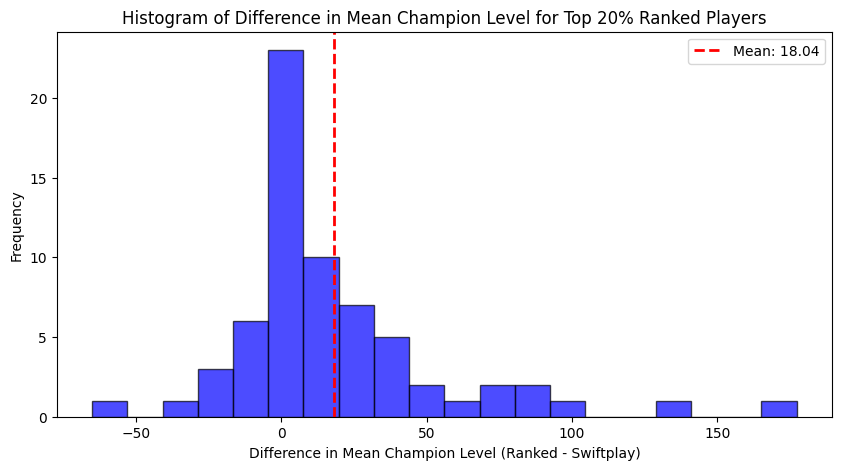

Mean difference in Champion Level: 46322.56
One-sample t-test for Top 20% Ranked Players: t=3.816, p=0.000


In [74]:
players_who_play_both = players.dropna(subset=["ranked_kd"])["puuid"]
ranked_means = ranked_filtered.groupby("puuid")["championLevel"].mean()

# Determine 80th percentile threshold
percentile_80 = ranked_means.quantile(0.8)

# Get players in the top 20% of Ranked champion levels
high_ranked_players = ranked_means[ranked_means >= percentile_80].index

# Filter Swiftplay data to only include these high-ranked players
swiftplay_high_ranked = swiftplay_filtered[swiftplay_filtered["puuid"].isin(high_ranked_players)]
ranked_high_ranked = ranked_filtered[ranked_filtered["puuid"].isin(high_ranked_players)]

# Compute mean championLevel for these players in both modes
swiftplay_means_high = swiftplay_high_ranked.groupby("puuid")["championLevel"].mean()
ranked_means_high = ranked_high_ranked.groupby("puuid")["championLevel"].mean()

# Compute the difference in mean championLevel (Ranked - Swiftplay)
level_differences_high = ranked_means_high - swiftplay_means_high

# Plot histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(level_differences_high, bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(level_differences_high.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {level_differences_high.mean():.2f}')
plt.xlabel("Difference in Mean Champion Level (Ranked - Swiftplay)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference in Mean Champion Level for Top 20% Ranked Players")
plt.legend()
plt.show()

print(f"Mean difference in Champion Level: {level_differences.mean():.2f}")
t_stat, p_value = stats.ttest_1samp(level_differences_high, 0)
print(f"One-sample t-test for Top 20% Ranked Players: t={t_stat:.3f}, p={p_value:.3f}")

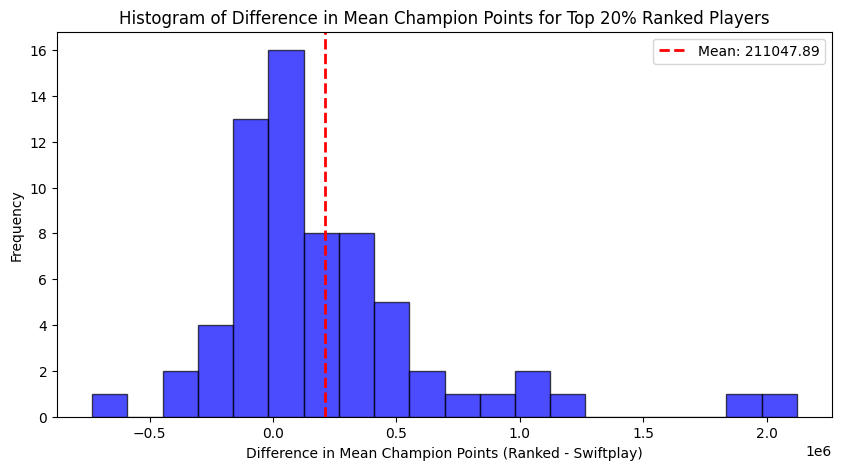

Mean difference in Champion Points: 46322.56
One-sample t-test for Top 20% Ranked Players: t=3.637, p=0.001


In [75]:
players_who_play_both = players.dropna(subset=["ranked_kd"])["puuid"]
ranked_means = ranked_filtered.groupby("puuid")["championPoints"].mean()

# Determine 80th percentile threshold
percentile_80 = ranked_means.quantile(0.8)

# Get players in the top 20% of Ranked champion levels
high_ranked_players = ranked_means[ranked_means >= percentile_80].index

# Filter Swiftplay data to only include these high-ranked players
swiftplay_high_ranked = swiftplay_filtered[swiftplay_filtered["puuid"].isin(high_ranked_players)]
ranked_high_ranked = ranked_filtered[ranked_filtered["puuid"].isin(high_ranked_players)]

# Compute mean championPoints for these players in both modes
swiftplay_means_high = swiftplay_high_ranked.groupby("puuid")["championPoints"].mean()
ranked_means_high = ranked_high_ranked.groupby("puuid")["championPoints"].mean()

# Compute the difference in mean championPoints (Ranked - Swiftplay)
point_differences_high = ranked_means_high - swiftplay_means_high

# Plot histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(point_differences_high, bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(point_differences_high.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {point_differences_high.mean():.2f}')
plt.xlabel("Difference in Mean Champion Points (Ranked - Swiftplay)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference in Mean Champion Points for Top 20% Ranked Players")
plt.legend()
plt.show()

print(f"Mean difference in Champion Points: {level_differences.mean():.2f}")
t_stat, p_value = stats.ttest_1samp(point_differences_high, 0)
print(f"One-sample t-test for Top 20% Ranked Players: t={t_stat:.3f}, p={p_value:.3f}")

This difference in champion points is very large!

# How are roles distributed in Swiftplay vs. Ranked?

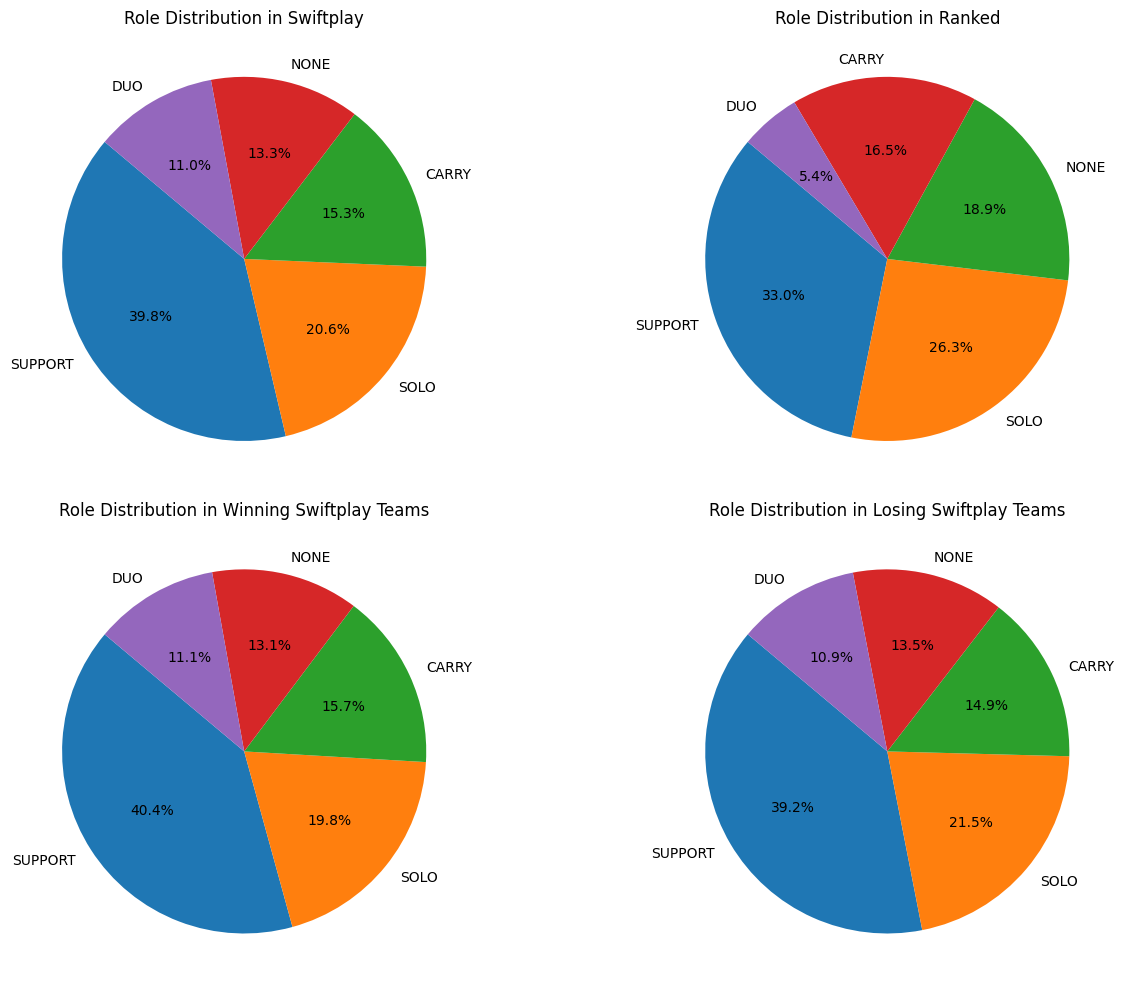

In [ ]:
swiftplay_roles = swiftplay_player_match_data["role"].value_counts()

ranked_roles = ranked_player_match_data["role"].value_counts()

swiftplay_win_roles = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 1]["role"].value_counts()

swiftplay_loss_roles = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 0]["role"].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Helper function to plot each pie chart
def plot_pie(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

plot_pie(axes[0], swiftplay_roles, "Role Distribution in Swiftplay")
plot_pie(axes[1], ranked_roles, "Role Distribution in Ranked")
plot_pie(axes[2], swiftplay_win_roles, "Role Distribution in Winning Swiftplay Teams")
plot_pie(axes[3], swiftplay_loss_roles, "Role Distribution in Losing Swiftplay Teams")

plt.tight_layout()
plt.show()